# Titanic Dataset (module 2)
**Author:** Jarred Gastreich 
**Date:** October, 31, 2025 
**Objective:** Predicts survival on Titantic via multiple features.


## Section 1. Import & Inspect the Data

In [38]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [39]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

titanic.info()

print(titanic.head(10))

titanic.isnull().sum()

print(titanic.describe())

print(titanic.corr(numeric_only=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

## Reflection 1:

1) How many data instances are there? 891 Entries
2) How many features are there? 15
3) What are the names? survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
4) Are there any missing values? age, deck, and embark_town are missing values.
5) Are there any non-numeric features? yes, 2 bool, 2 category, 5 object.

6) Are the data instances sorted on any of the attributes? No.
7) What are the units of age? ##.#, there are 714 total
8) What are the minimum, median and max age? 0.42 = min. 29.30 = mean. 80 = max.
9) What two different features have the highest correlation? parch and sibsp

10) Are there any categorical features that might be useful for prediction? alone, age, and survived. 

## Section 2. Data Exploration & Preparation

...


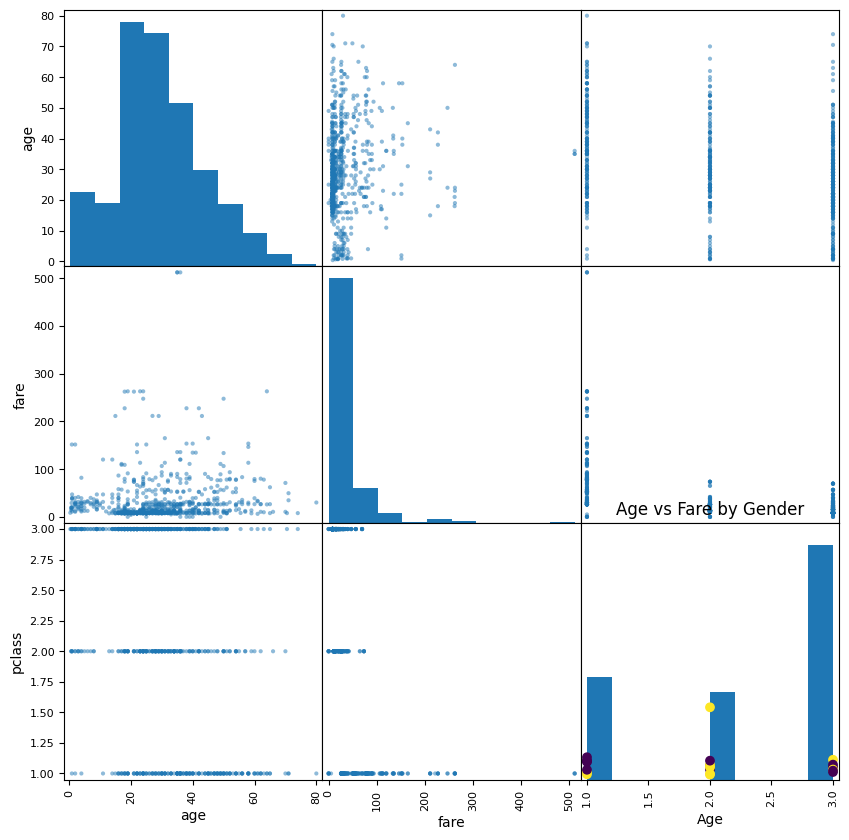

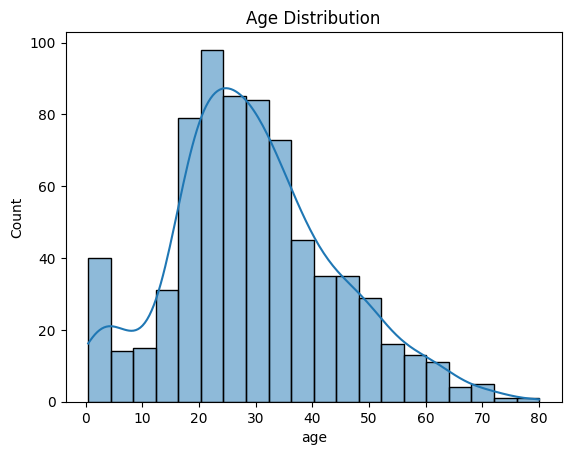

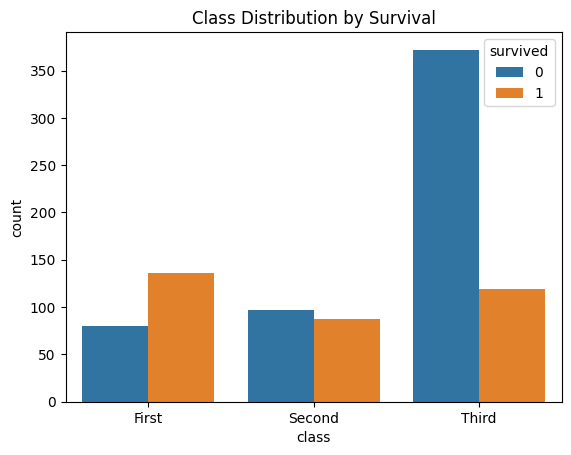

In [40]:
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

print("...")

plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

#Create a histogram of age:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Create a count plot for class and survival
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()




## Section 2 Reflection

What patterns or anomalies do you notice? The age distrobution shows that middle age is most likely to survive, however there is an unusual spike for infants who survived.

Do any features stand out as potential predictors? Age and class can be predictors.

Are there any visible class imbalances? The class imbalance is that third class was most likely to not survive.




### Section 2.2 Handle missing values and clean data

Age was missing values. We can impute missing values for age using the median:


In [41]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\jarre\AppData\Local\Temp\ipykernel_3884\3499949714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\jarre\AppData\Local\Temp\ipykernel_3884\3499949714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### Section 2.3 Feature Engineering
Create a new feature: family size

In [42]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Create a binary feature for 'alone':

titanic['alone'] = titanic['alone'].astype(int)

## Section 2.3

Why might family size be a useful feature for predicting survival? 
Why convert categorical data to numeric? 

Family size would be a useful feature if predicting survival and the prediction was survival increases as family size decreases. Numerical date just makes sense here, and will benefit us when working with the algorithyms. 

## Section 3. Feature Selection & Justification

For classification, we’ll use survived as the target variable.

Input features: age, fare, pclass, sex, family_size
Target: survived

In [43]:
#Assign input features to X
#Assign target variable to y (as applicable)

X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

## Reflection 3

Why are these features selected?
Are there any features that are likely to be highly predictive of survival?

These features are selected because they all have stereotypes associated with survivability. For example, we would expect to see a bell curve for age and survival. Perhaps if someone paid a higher fair they would not be closer to the hull of the ship which would decrease survival. I think age would have the highest prediction of surival.

## Section 4. Splitting


In [44]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [45]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


## Reflection 4

Why might stratification improve model performance?
How close are the training and test distributions to the original dataset?
Which split method produced better class balance?

Stratification can improve model performance because it preserves proportionality in features and reduces bias. The training and test distribution is fairly close or about .1 to .08 difference. Neither is perfectly balanced but I believe the train set is more balanced.
